In [1]:
%run "/home/kumail/Bioinformatics/pepTrans Code/imports.py"
%run "/home/kumail/Bioinformatics/pepTrans Code/Binary_Classification_pepTrans_module.py" 
%run "/home/kumail/Bioinformatics/pepTrans Code/Binding_Site_pepTrans_module.py"
%run "/home/kumail/Bioinformatics/pepTrans Code/Binding_Affinity_pepTrans_Module.py"
%run "/home/kumail/Bioinformatics/pepTrans Code/Cross_Validation_pepTrans_Binding_Sites.py"
%run "/home/kumail/Bioinformatics/pepTrans Code/pepTrans.py"
%run "/home/kumail/Bioinformatics/pepTrans Code/run_pepTrans_Jupyter.py"
import warnings
import logging
warnings.filterwarnings("ignore")
logging.getLogger('tensorflow').setLevel(logging.ERROR)
warnings.filterwarnings("ignore", message=".*TensorFlow Addons.*")
warnings.filterwarnings("ignore", message=".*you are currently using is 2.9.0 and is not supported.*")
os.environ['CUDA_VISIBLE_DEVICES'] = '5'
tf.config.run_functions_eagerly(True)

/home/kumail/anaconda3/envs/SKS/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/home/kumail/anaconda3/envs/SKS/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an i

In [2]:
base_path = "/home/kumail/Bioinformatics/Dataset/Bindingsites/Output/Protein_Length_500"

train_generators = {}
test_generators = {}

# Loop over the 5 folds
for i in range(1, 6):
    train_path = f"{base_path}/fold_{i}_train_data.h5"
    test_path = f"{base_path}/fold_{i}_test_data.h5"

    train_peptide, train_protein, train_labels = read_hdf5_file(train_path)
    test_peptide, test_protein, test_labels = read_hdf5_file(test_path)

    train_generators[f"fold_{i}"] = DataGenerator(train_peptide, train_protein, train_labels, batch_size=128)
    test_generators[f"fold_{i}"] = DataGenerator(test_peptide, test_protein, test_labels, batch_size=128)
    
print(train_generators)
print(test_generators)

{'fold_1': <Binding_Site_pepTrans_module.DataGenerator object at 0x7fb38b622b80>, 'fold_2': <Binding_Site_pepTrans_module.DataGenerator object at 0x7fb26bd42670>, 'fold_3': <Binding_Site_pepTrans_module.DataGenerator object at 0x7fb26a4a0220>, 'fold_4': <Binding_Site_pepTrans_module.DataGenerator object at 0x7fb26a3589d0>, 'fold_5': <Binding_Site_pepTrans_module.DataGenerator object at 0x7fb26a2ee8e0>}
{'fold_1': <Binding_Site_pepTrans_module.DataGenerator object at 0x7fb38b622ac0>, 'fold_2': <Binding_Site_pepTrans_module.DataGenerator object at 0x7fb26a2f59d0>, 'fold_3': <Binding_Site_pepTrans_module.DataGenerator object at 0x7fb26a4a0340>, 'fold_4': <Binding_Site_pepTrans_module.DataGenerator object at 0x7fb26a358f70>, 'fold_5': <Binding_Site_pepTrans_module.DataGenerator object at 0x7fb26a2ee8b0>}



Training on Fold 1
Epoch 1/5000
40/40 [==============================] - 35s 861ms/step - loss: 1.3690 - custom_metrics_MCC: 0.1217 - val_loss: 0.7511 - val_custom_metrics_MCC: 0.1815
Epoch 2/5000
40/40 [==============================] - 30s 739ms/step - loss: 0.7424 - custom_metrics_MCC: 0.1874 - val_loss: 0.7291 - val_custom_metrics_MCC: 0.2144
Epoch 3/5000
40/40 [==============================] - 29s 722ms/step - loss: 0.7203 - custom_metrics_MCC: 0.2196 - val_loss: 0.7153 - val_custom_metrics_MCC: 0.2335
Epoch 4/5000
40/40 [==============================] - 29s 713ms/step - loss: 0.7042 - custom_metrics_MCC: 0.2601 - val_loss: 0.7114 - val_custom_metrics_MCC: 0.2399
Epoch 5/5000
40/40 [==============================] - 29s 715ms/step - loss: 0.7011 - custom_metrics_MCC: 0.2648 - val_loss: 0.7099 - val_custom_metrics_MCC: 0.2417
Epoch 6/5000
40/40 [==============================] - 29s 713ms/step - loss: 0.7006 - custom_metrics_MCC: 0.2628 - val_loss: 0.7085 - val_custom_metrics_MC

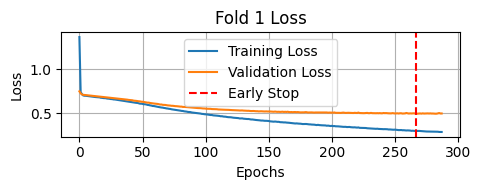

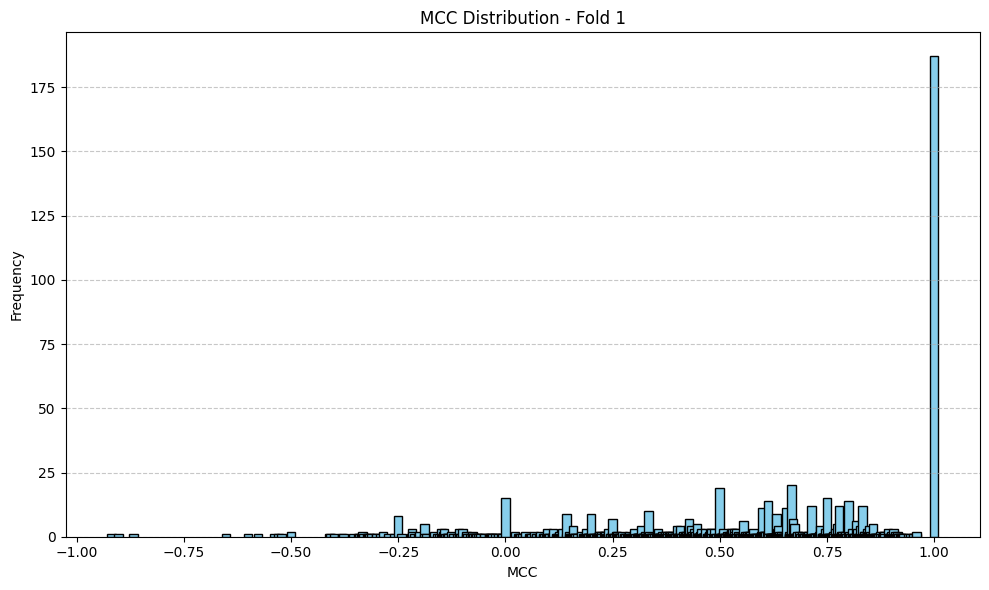

Fold 1 - Mean MCC: 0.5268, Mean AUC: 0.7549

Training on Fold 2
Epoch 1/5000
40/40 [==============================] - 29s 708ms/step - loss: 1.4996 - custom_metrics_MCC: 0.1296 - val_loss: 0.7528 - val_custom_metrics_MCC: 0.1664
Epoch 2/5000
40/40 [==============================] - 29s 705ms/step - loss: 0.7443 - custom_metrics_MCC: 0.1886 - val_loss: 0.7271 - val_custom_metrics_MCC: 0.2104
Epoch 3/5000
40/40 [==============================] - 28s 697ms/step - loss: 0.7245 - custom_metrics_MCC: 0.2222 - val_loss: 0.7181 - val_custom_metrics_MCC: 0.2273
Epoch 4/5000
40/40 [==============================] - 29s 716ms/step - loss: 0.7115 - custom_metrics_MCC: 0.2467 - val_loss: 0.7114 - val_custom_metrics_MCC: 0.2273
Epoch 5/5000
40/40 [==============================] - 29s 708ms/step - loss: 0.7085 - custom_metrics_MCC: 0.2495 - val_loss: 0.7104 - val_custom_metrics_MCC: 0.2274
Epoch 6/5000
40/40 [==============================] - 29s 708ms/step - loss: 0.7064 - custom_metrics_MCC: 0.253

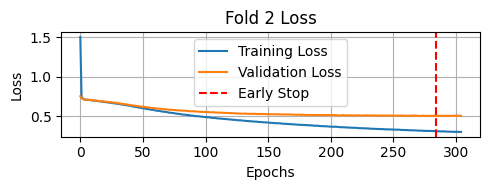

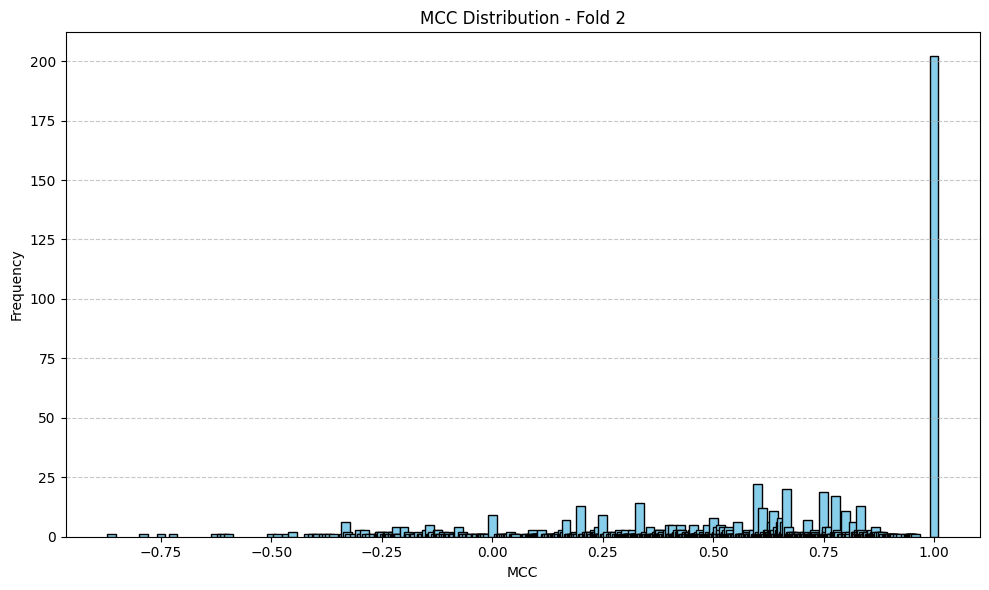

Fold 2 - Mean MCC: 0.5127, Mean AUC: 0.7491

Training on Fold 3
Epoch 1/5000
40/40 [==============================] - 49s 1s/step - loss: 1.2540 - custom_metrics_MCC: 0.1207 - val_loss: 0.7693 - val_custom_metrics_MCC: 0.1323
Epoch 2/5000
40/40 [==============================] - 29s 725ms/step - loss: 0.7477 - custom_metrics_MCC: 0.1775 - val_loss: 0.7329 - val_custom_metrics_MCC: 0.2125
Epoch 3/5000
40/40 [==============================] - 29s 723ms/step - loss: 0.7250 - custom_metrics_MCC: 0.2125 - val_loss: 0.7215 - val_custom_metrics_MCC: 0.2388
Epoch 4/5000
40/40 [==============================] - 30s 737ms/step - loss: 0.7142 - custom_metrics_MCC: 0.2324 - val_loss: 0.7179 - val_custom_metrics_MCC: 0.2433
Epoch 5/5000
40/40 [==============================] - 30s 745ms/step - loss: 0.7127 - custom_metrics_MCC: 0.2316 - val_loss: 0.7166 - val_custom_metrics_MCC: 0.2443
Epoch 6/5000
40/40 [==============================] - 30s 749ms/step - loss: 0.7110 - custom_metrics_MCC: 0.2337 -

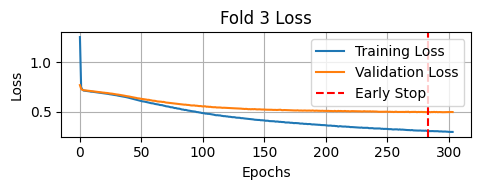

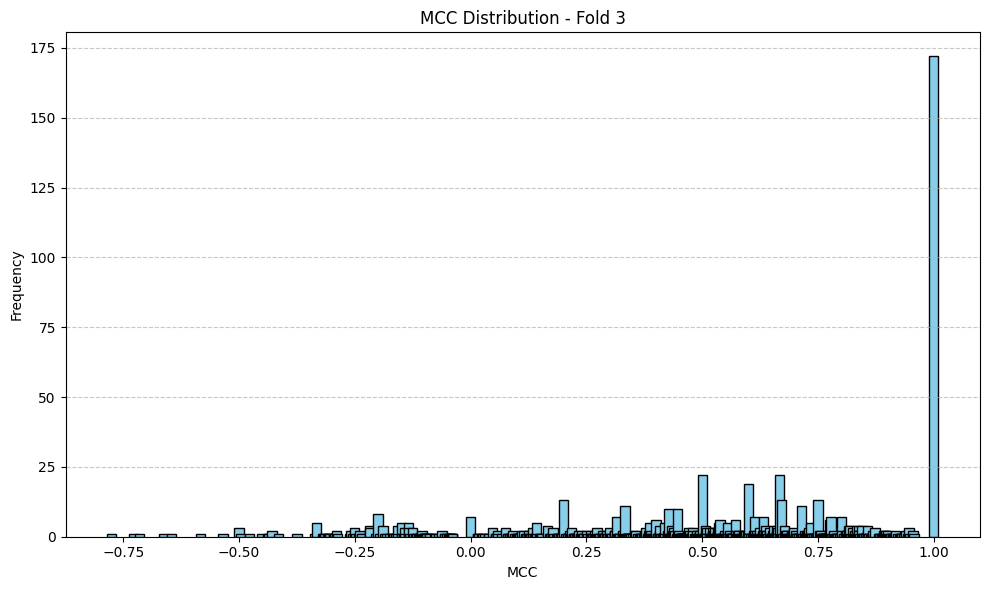

Fold 3 - Mean MCC: 0.5134, Mean AUC: 0.7502

Training on Fold 4
Epoch 1/5000
40/40 [==============================] - 28s 693ms/step - loss: 1.3121 - custom_metrics_MCC: 0.1314 - val_loss: 0.7559 - val_custom_metrics_MCC: 0.1862
Epoch 2/5000
40/40 [==============================] - 28s 688ms/step - loss: 0.7392 - custom_metrics_MCC: 0.2182 - val_loss: 0.7271 - val_custom_metrics_MCC: 0.2580
Epoch 3/5000
40/40 [==============================] - 28s 683ms/step - loss: 0.7134 - custom_metrics_MCC: 0.2701 - val_loss: 0.7122 - val_custom_metrics_MCC: 0.2800
Epoch 4/5000
40/40 [==============================] - 29s 708ms/step - loss: 0.6972 - custom_metrics_MCC: 0.2941 - val_loss: 0.7068 - val_custom_metrics_MCC: 0.2922
Epoch 5/5000
40/40 [==============================] - 34s 835ms/step - loss: 0.6953 - custom_metrics_MCC: 0.2987 - val_loss: 0.7052 - val_custom_metrics_MCC: 0.2936
Epoch 6/5000
40/40 [==============================] - 33s 805ms/step - loss: 0.6928 - custom_metrics_MCC: 0.295

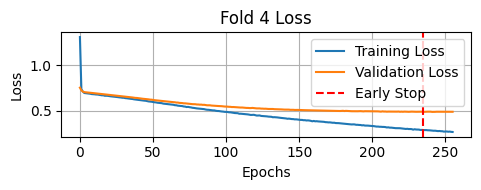

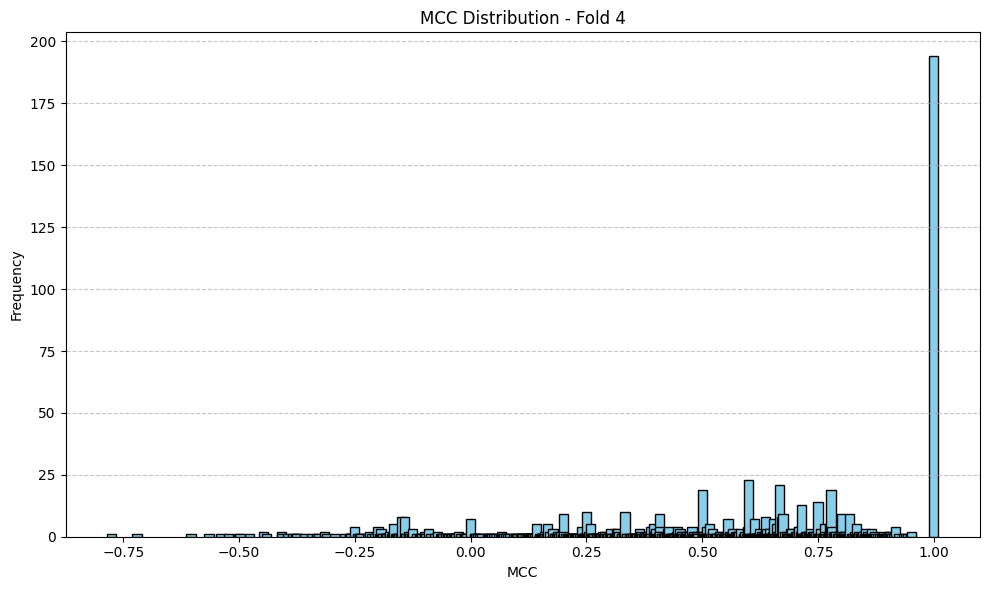

Fold 4 - Mean MCC: 0.5235, Mean AUC: 0.7566

Training on Fold 5
Epoch 1/5000
40/40 [==============================] - 31s 759ms/step - loss: 1.3080 - custom_metrics_MCC: 0.1478 - val_loss: 0.7525 - val_custom_metrics_MCC: 0.2002
Epoch 2/5000
40/40 [==============================] - 28s 692ms/step - loss: 0.7334 - custom_metrics_MCC: 0.2063 - val_loss: 0.7191 - val_custom_metrics_MCC: 0.2635
Epoch 3/5000
40/40 [==============================] - 28s 685ms/step - loss: 0.7040 - custom_metrics_MCC: 0.2656 - val_loss: 0.7045 - val_custom_metrics_MCC: 0.3078
Epoch 4/5000
40/40 [==============================] - 27s 677ms/step - loss: 0.6884 - custom_metrics_MCC: 0.2904 - val_loss: 0.7020 - val_custom_metrics_MCC: 0.3152
Epoch 5/5000
40/40 [==============================] - 32s 794ms/step - loss: 0.6863 - custom_metrics_MCC: 0.2940 - val_loss: 0.7000 - val_custom_metrics_MCC: 0.3161
Epoch 6/5000
40/40 [==============================] - 33s 803ms/step - loss: 0.6835 - custom_metrics_MCC: 0.293

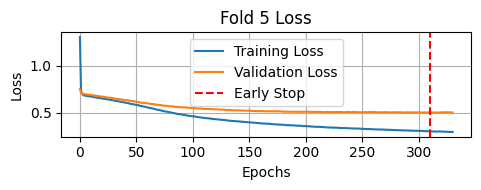

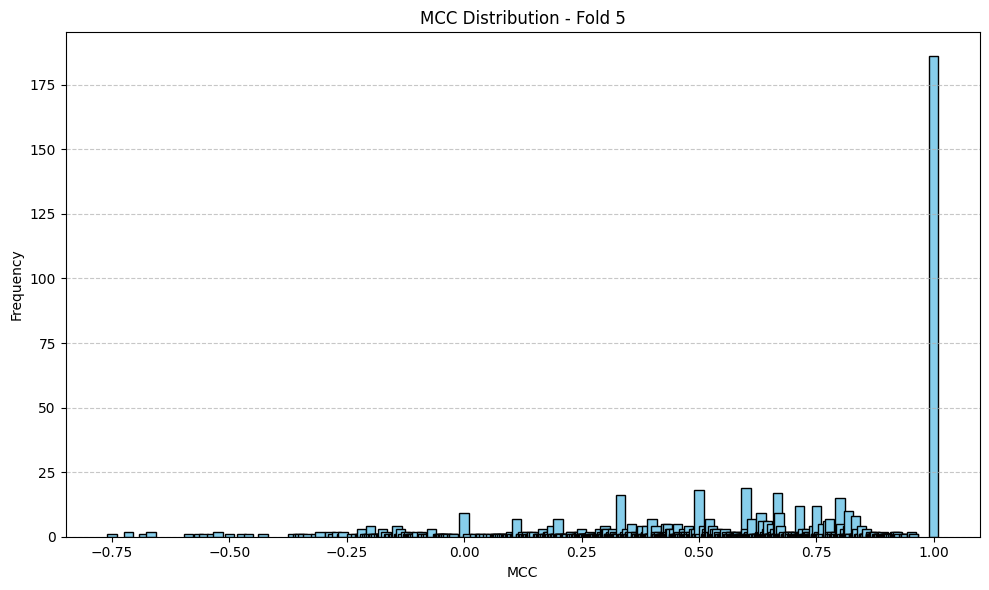

Fold 5 - Mean MCC: 0.5335, Mean AUC: 0.7586

Cross-Validation Performance Summary
Fold 1: MCC = 0.5268, AUC = 0.7549
Fold 2: MCC = 0.5127, AUC = 0.7491
Fold 3: MCC = 0.5134, AUC = 0.7502
Fold 4: MCC = 0.5235, AUC = 0.7566
Fold 5: MCC = 0.5335, AUC = 0.7586
----------------------------------------
Mean MCC: 0.5220 ± 0.0080
Mean AUC: 0.7539 ± 0.0037


In [4]:
mcc_per_fold = []
model_auc_per_fold = []

first_fold = next(iter(train_generators))
sample_batch = train_generators[first_fold][0]
peptide_length = sample_batch[0][0].shape[1]
protein_length = sample_batch[0][1].shape[1]
embedding_dim = sample_batch[0][0].shape[2]

for fold_no in range(1, 6):
    print(f"\nTraining on Fold {fold_no}")

    train_gen = train_generators[f"fold_{fold_no}"]
    test_gen = test_generators[f"fold_{fold_no}"]

    pep_test, pro_test, lbl_test = [], [], []
    for batch in test_gen:
        p, t = batch[0]
        l = batch[1]
        pep_test.append(p)
        pro_test.append(t)
        lbl_test.append(l)
    pep_test = np.concatenate(pep_test, axis=0)
    pro_test = np.concatenate(pro_test, axis=0)
    lbl_test = np.concatenate(lbl_test, axis=0)

    with tf.device('/GPU:5'):
        model = pepTrans_Binding_Sites(peptide_length, protein_length, embedding_dim)
        early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

        history = model.fit(train_gen,
                            validation_data=test_gen,
                            epochs=5000,
                            callbacks=[early_stop],
                            verbose=1)

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.figure(figsize=(5, 2))
    plt.plot(train_loss, label="Training Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.axvline(np.argmin(val_loss), color='red', linestyle='--', label='Early Stop')
    plt.title(f'Fold {fold_no} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    mcc_values, auc_values = [], []
    for i in range(len(pep_test)):
        pred = model.predict([np.expand_dims(pep_test[i], axis=0), 
                              np.expand_dims(pro_test[i], axis=0)], verbose=0).flatten()
        y_true = lbl_test[i].reshape(-1)
        auc, mcc = custom_metrics(tf.convert_to_tensor(y_true, dtype=tf.float32),
                                  tf.convert_to_tensor(pred, dtype=tf.float32))
        mcc_values.append(mcc)
        auc_values.append(auc)

    mean_mcc, mean_auc = np.mean(mcc_values), np.mean(auc_values)
    mcc_per_fold.append(mean_mcc)
    model_auc_per_fold.append(mean_auc)

    unique_vals = sorted(set(mcc_values))
    counts = [mcc_values.count(val) for val in unique_vals]
    plt.figure(figsize=(10, 6))
    plt.bar(unique_vals, counts, width=0.02, color='skyblue', edgecolor='black')
    plt.title(f'MCC Distribution - Fold {fold_no}')
    plt.xlabel('MCC')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', axis='y', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(f"Fold {fold_no} - Mean MCC: {mean_mcc:.4f}, Mean AUC: {mean_auc:.4f}")
    
overall_mean_mcc = np.mean(mcc_per_fold)
overall_std_mcc = np.std(mcc_per_fold)

overall_mean_auc = np.mean(model_auc_per_fold)
overall_std_auc = np.std(model_auc_per_fold)

print("\n" + "="*40)
print("Cross-Validation Performance Summary")
print("="*40)
for i in range(5):
    print(f"Fold {i+1}: MCC = {mcc_per_fold[i]:.4f}, AUC = {model_auc_per_fold[i]:.4f}")
print("-"*40)
print(f"Mean MCC: {overall_mean_mcc:.4f} ± {overall_std_mcc:.4f}")
print(f"Mean AUC: {overall_mean_auc:.4f} ± {overall_std_auc:.4f}")

### For Benchmark Dataset 5-fold CV

In [2]:
args = SimpleNamespace(
    mode='bs',
    train_h5="/home/kumail/Bioinformatics/Dataset/Bindingsites/Output/500_padded_embeddings_labels.h5",  
    test_h5=None,
    gpu='5',
    weights=None
)
run_pepTrans(args)

Using GPU 5
Training pepTrans model for Binding Site Prediction with 5-fold cross-validation...


 Training pepTrans model for Peptide Binding Residues on fold 1


2025-08-09 19:56:00.840561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-09 19:56:01.606638: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11097 MB memory:  -> device: 0, name: NVIDIA TITAN Xp, pci bus id: 0000:0d:00.0, compute capability: 6.1


Epoch 1/5000


2025-08-09 19:56:04.092333: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2025-08-09 19:56:04.514549: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-08-09 19:56:04.517580: E tensorflow/stream_executor/gpu/asm_compiler.cc:105] You are using ptxas 8.x, but TF requires ptxas 9.x (and strongly prefers >= 11.1).  Compilation of XLA kernels below will likely fail.

You may not need to update CUDA; cherry-picking the ptxas binary is often sufficient.


40/40 [==============================] - 32s 747ms/step - loss: 1.4185 - custom_metrics_MCC: 0.1351 - val_loss: 0.7566 - val_custom_metrics_MCC: 0.1732
Epoch 2/5000
11/40 [=======>......................] - ETA: 16s - loss: 0.7515 - custom_metrics_MCC: 0.1663

KeyboardInterrupt: 